In this notebooks, we will analyize how to determine when is the optimal for enter or exit in trading.

For simplicity, I will think only three actions; enter, hold , and exit.

In [1]:
#generic
%matplotlib inline
from __future__ import print_function

import numpy as np
import time
import tensorflow as tf
# import quandl 
import matplotlib.pyplot as plt

from yahoo_finance import Share

In [2]:
def get_data_by_key(key, data):
    data_it = iter(data)
    return_data = []
    flag = True
    for d in data_it:
        if key !="Date":
            return_data.append(float(d[key]))
        else:
            return_data.append(d[key])
        
    return np.array(return_data)

In [3]:
def get_data_by_list_fixed(name_list, start_date, end_date, data_type="Open"):
    share_list = []
    new_name_list = []
    for name in name_list:
        try:
            share_list.append(Share(name))
            new_name_list.append(name)
        except:
            pass
    
    stock_data_list = []
    date = []
    flag = True
    N_data = 0
    fail_name_list = []
    ret_name_list = []
    for idx, share in enumerate(share_list):
        name = new_name_list[idx]
        try:
            hist_data = share.get_historical(start_date=start_date, end_date=end_date)
            stock_data = map(float, get_data_by_key(key=data_type, data=hist_data))
            n_data = len(stock_data)
            if n_data == 0:
                fail_name_list.append(name)
            date.append(get_data_by_key(key='Date', data=hist_data))
            stock_data_list.append(stock_data)
            ret_name_list.append(name)
        except:
            pass
    print ("fail_name_list: ", fail_name_list)
    return np.array(stock_data_list).T, date, ret_name_list

In [4]:
energy = ["PTR", "XOM", "CVX", "RDS-A", "BP", "TOT", "SLB", "KMI", "COP", "CEO", 
          "E", "STO", "OXY", "PBR", "EOG", "APC", "SU", "ENB", "HAL", "WMB"]
financial = ["WFC", "JPM", "HSBC", "BAC", "C", "SAN", "MTU", "RY", "WBK", "TD", "GS", 
             "LYG", "AXP", "AIG", "MS", "ITUB", "BCS", "BBVA"]
healthcare = ["NVS", "JNJ", "PFE", "MRK", "GILD", "SNY", "AMGN", "NVO", "GSK", "UNH",
             "MDT", "BMY", "CELG", "BIIB", "AZN", "LLY", "ABT", "AGN", "VRX", "TEVA",
             "TMO", "SHPG", "REGN"]
buisiness = ["ACN", "LMT", "CNI", "FDX", "DAL", "CSX", "AAL", "CP", "NSC", "NOC", "LUV"]
telecom = ["CHL", "VZ", "T", "VOD", "NTT", "AMX", "CHA", "BT", "CHU", "ORAN", "BCE",
           "CHT", "SKM", "TI", "TU", "S", "TLK", "DUK", "NGG", "D", "SO", "EXC", "KEP",
          "AEP", "SRE", "PCG", "HNP", "PPL", "PEG", "EIX", "ETP", "ED", "ENI", "XEL", "ES", "FE"]
hardware = ["AAPL", "ORCL", "IBM", "INTC", "CSCO", "TSM", "QCOM", "HPQ", "TXN", "EMC",
           "CAJ", "ASML", "ERIC", "SNE", "AVGO", "MU", "GLW", "NXPI", "NOK",
           "AMAT", "WDC", "WIT", "ADI", "STX", "APH"]
software = ["MSFT", "GOOGL", "BIDU", "EBAY", "SAP", "CRM", "YHOO", "VMW",
            "ADBE", "CTSH", "INFY", "INTU", "LNKD", "RHT", "NTES", "CHKP", 
            "CA", "ADSK", "AKAM", "NVDA"]
industrial = ["GE", "V", "MA", "UTX", "MMM", "BA", "UNP", "UPS", "HON", "DHR", "CAT", 
              "ABB", "GD", "ADP", "EMR", "ITW", "ECL", "TEL", "PCAR", "WM"]
manufacturing = ["TM", "HMC", "F", "GM", "JCI", "TSLA", "TTM", "CMI", "DLPH", "MGA",
                "CMI", "DLPH", "MGA", "GPC", "BWA", "HOG", "ALV", "HAR", "LEA", "LKQ", 
                 "WBC", "GT", "FCAU", "NSANY", "NAV"]
consumer = ["PG", "BUD", "KO", "PEP", "UL", "PM", "BTI", "MO", "ABEV", "DEO", "MDLZ",
            "CL", "MON", "MCK", "KMB", "WHR", "DIS", "CMCSA", "FOXA", "TWX", "TWC",
           "DISH", "CBS", "DISCA", "TV", "CHTR", "QVCA", "OMC", "NLSN", 
           "PSO", "SJR", "NFLX"]
diversified = ["BRK-A", "BRK-B", "UTX", "BC", "RTN", "OLN", "ITT", "MSBHY", "KWHIY", 
               "ABB", "IEP", "GE"]
retailing = ["WMT", "AMZN", "HD", "MCD", "NKE", "SBUX", "CVS", "WBA", "PCLN", "COST", 
            "TGT", "TJX", "LVS", "YUM", "CCL", "LUX", "DG", "M", "AZO", "ROST", "CMG", "GPS", 
            "DLTR", "RCL", "KSS", "HOT", "JWN"]

input_list = energy + financial + healthcare + buisiness + telecom\
+ hardware + software + industrial + manufacturing + consumer + diversified + retailing
print (len(input_list))

269


In [5]:
print ("Started!!")

st = time.time()
start_date="2014-04-01"
end_date="2016-04-01"
input_data, date, input_list = get_data_by_list_fixed(input_list, start_date=start_date, end_date=end_date) 
elapsed = time.time() - st
print ("time for getting training_data:", elapsed)

Started!!
fail_name_list:  ['ENI', 'TWC']
time for getting training_data: 1335.59390497


In [6]:
print (input_data.shape)

(269,)


In [9]:
length = len(input_data[0])
fail_idx = []
for i in xrange(len(input_data)):
    if length != len(input_data[i]):
        fail_idx.append(i)
        print (i)

217


In [10]:
input_data = list(input_data)
count = 0
for i in fail_idx:
    idx = i - count
    del input_data[idx]
    del input_list[idx]
    
new_input_data = []
for i in xrange(len(input_data)):
    new_input_data.append(input_data[i])
    
new_input_data = np.array(new_input_data)
print(new_input_data.shape)

(266, 505)


In [11]:
input_data = new_input_data.T
print(input_data.shape)

(505, 266)


In [12]:
input_list[0]

'PTR'

# Convert date label for plot

In [14]:
import datetime

def convert_time_format(date):
    date_tilde = date.split("-")
    date_tilde = map(int, date_tilde)
    return datetime.datetime(*date_tilde)

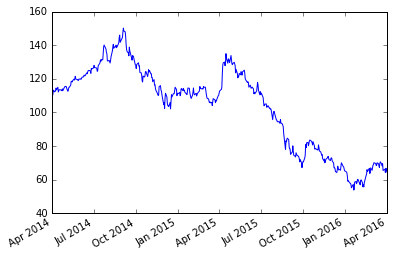

In [156]:
date_each = date[0]

date_label=[]
for i in xrange(len(date_each)):
    date_label.append(convert_time_format(date_each[i]))
    
plt.plot(date_label, input_data[:, 0])
plt.gcf().autofmt_xdate()

# DQN-MLP

Taking our situations into considerations, lerning will be done in online fashion.

In [116]:
class DQNMLP(object):
    def __init__(self, n_stock, hidden_layers, n_actions, activation=tf.nn.relu,  
                           trade_stock_idx=0, n_batch=32,
                           gam=0.99, n_history=4, is_initialize=True):
        """initialized approximate value function
        
        Args:
            n_stock (int): the number of stock to use
            hiddne layers(list): list of the number of nodes in each hidden layer
            n_actions(int): Mostly, the number of allowable actions will be two; in and hold or exit and hold
            trade_stock_idx(int): trading stock index
            gam (float): discount factor
            n_history(int): nubmer of history that will be used as input
            n_batch (int): batch size
            freq_target_update (int): frequency of update for target network
            is_intialized(optional) (bool): if True, the graph will be initialized
        """
        print ("building model....")
        self.n_stock = n_stock
        self.hidden_layers = hidden_layers
        self.n_actions = n_actions
        self.activation = activation
        self.gam = gam
        self.n_history = n_history
        self.n_batch = n_batch
        self.trade_stock_idx = trade_stock_idx
        
        # intialize graph to avoid conflications
        if is_initialize is True:
            sess  = tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()
        
        self._stock_data = tf.placeholder(tf.float32, [self.n_batch, n_history, n_stock], name= "stock_data")
        # weather tarders is doing trade or not
        self._is_in = tf.placeholder(tf.float32, [self.n_batch], name="is_in")
        
        # change format for training
        stock_data_tilde = tf.reshape(self._stock_data, [self.n_batch, n_history * n_stock])
        is_in_tilde = tf.reshape(self._is_in, [self.n_batch, 1])
        self._input = tf.concat(1, [stock_data_tilde, is_in_tilde], name="input")
        self._target = tf.placeholder(tf.float32, [self.n_batch], name="target")
        
        # normalization for input
        n_layer0 = n_history * n_stock + 1
        shape = [n_layer0]
        gamma = tf.Variable(tf.constant(1.0, shape=shape), name="gamma")
        beta = tf.Variable(tf.constant(0.0, shape=shape), name="beta")
        self.normalized_input = self.batch_normalization(self._input, gamma=gamma, beta=beta)
                
        # keep parameters for pretraining
        self.gamma_list = []
        self.beta_list = []
        self.gamma_list.append(gamma)
        self.beta_list.append(beta)
        
        # parameters
        self.W_list = []
        self.b_list = []
        
        # the name of variable scope will be layer0, layer1, ...
        self.x_list = []
        x = self.normalized_input
        self.x_list.append(x)
        n_in = n_layer0
        for i_layer in xrange(len(hidden_layers)):
            with tf.variable_scope("hidden_layer%d" % i_layer):
                n_out = hidden_layers[i_layer]
                W = self.weight_variable([n_in, n_out])
                b = self.bias_variable([n_out])
                n_in = n_out
                
                # keep parameters for pretraining
                self.W_list.append(W)
                self.b_list.append(b)
                
                z = tf.matmul(x, W) + b
      
                shape = [n_out]
                gamma = tf.Variable(tf.constant(1.0, shape=shape), name="gamma")
                beta = tf.Variable(tf.constant(0.0, shape=shape), name="beta")
                
                # keep parameters for pretraining
                self.gamma_list.append(gamma)
                self.beta_list.append(beta)
                
                normalized_z = self.batch_normalization(z, shape, gamma, beta)
                x = self.activation(normalized_z)
                self.x_list.append(x)
        # each node should be corresponding to each action
        n_out = n_actions
        W = self.weight_variable([n_in, n_out])
        b = self.bias_variable([n_out])
                
        # keep parameters for pretraining
        self.W_list.append(W)
        self.b_list.append(b)
        self.output = tf.matmul(x, W) + b

        # actions should be 0: hold, 1: in when you are out 
        # 0:hold, 1:out, when you are in
        self._action = tf.placeholder(tf.int32, [self.n_batch], name="action")
        self.Q = tf.pack([tf.gather(self.output[i, :], self._action[i], name="chosen_action") for i in xrange(n_batch)], name="Q")
        
        # make graph for target
        self.opt_Q = tf.reduce_max(self.output, reduction_indices=1, name="opt_Q")
        self.non_opt_Q = -tf.reduce_max(-self.output, reduction_indices=1)
        self.opt_action = tf.argmax(self.output, 1, name='opt_action')
        current_price = self._stock_data[:, n_history - 1, trade_stock_idx]
        hist_price = self._stock_data[:, n_history - 2, trade_stock_idx]
        self.reward = (current_price - hist_price) * tf.to_float(self._is_in)
        target_nonend = self.reward + gam * self.opt_Q
        
        # if eposde end end index will be 1 and we recieve only reward as Q- value
        self._end_idx = tf.placeholder(tf.int32, [self.n_batch], name="end_idx")
        self.target_val = tf.pack([tf.gather(tf.pack([target_nonend, self.reward])[:, i], self._end_idx[i]) for i in xrange(self.n_batch)])
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[], name="learning_rate")
        self.loss = tf.reduce_mean(tf.square(self.Q - self._target))
        # fixate on using this optimizer, otherwize, otherwise endup using unecessary graph nose
        self.optimizer = tf.train.AdamOptimizer(self._learning_rate, name="Optimizer")
        self.train = self.optimizer.minimize(self.loss)
        
        # build nonbatch graph
        self._data_nonbatch = tf.placeholder(tf.float32, [self.n_history, self.n_stock], name= "nonbatch_stock_data")
        self._is_in_nonbatch = tf.placeholder(tf.int32, [1], name="nonbatch_is_in")
        
        # change format for training
        data_tilde = tf.reshape(self._data_nonbatch, [1, n_history * n_stock])
        is_in_tilde = tf.to_float(tf.reshape(self._is_in_nonbatch, [1, 1]))
        self._input_nonbatch = tf.concat(1, [data_tilde, is_in_tilde], name="nonbatch_input")
        self._target_nonbatch = tf.placeholder(tf.float32, name="nonbatch_target")
        
        # normalization for input
        normalized_input = self.batch_normalization(self._input_nonbatch, gamma=self.gamma_list[0], beta=self.beta_list[0])
        
        # the name of variable scope will be layer0, layer1, ...
        x = normalized_input
        for i_layer in xrange(len(hidden_layers)):
            with tf.variable_scope("hidden_layer%d" % i_layer):
                z = tf.matmul(x, self.W_list[i_layer]) + self.b_list[i_layer]
                normalized_z = self.batch_normalization(z, gamma=self.gamma_list[i_layer + 1], beta=self.beta_list[i_layer + 1])
                x = self.activation(normalized_z)
        self.output_nonbatch = tf.matmul(x, self.W_list[-1]) + self.b_list[-1]
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
        
    def batch_normalization(self, input_data, shape=None, gamma=None, beta=None):
        # input should be hidden_dim
        eps = 1e-5
        if gamma is None:
            gamma = tf.Variable(tf.constant(1.0, shape=shape))
        if beta is None:
            beta = tf.Variable(tf.constant(0.0, shape=shape))
        mean, variance = tf.nn.moments(input_data, [0])
        return gamma * (input_data - mean) / tf.sqrt(variance + eps) + beta
    
    def eps_greedy(self, eps, is_in, stock_data, sess):
        """Return action chosen by greedy algorithm"""
        u = np.random.uniform()
        q_value = self.output_nonbatch.eval(session=sess, 
                                                                         feed_dict={self._is_in_nonbatch: [is_in],
                                                                                              self._data_nonbatch: stock_data})[0]
        if u < 1 - eps:
            action = np.argmax(q_value) 
        else:
            action = np.random.randint(0, self.n_actions)
        
        return action
                
    
    def training(self, stock_data, init_cash=1000, init_is_in=0, 
                         init_eps=1.0, decay_eps=0.99, min_eps=0.1, 
                         learning_rate=1e-4, n_memory=1000, n_epochs=100):
        """training DQN which consider three actions; sell, buy, hold
              money and n_stock are considered as state variable
        
        Args:
            data (list): stock price for one company
            n_memory (int): the number of data that is used for Experience Replay
            eps (float): the epsilon of greedy epsilon used for behavior policy
            init_cash (float): initial available cash
            init_stock (int): the number of stock data 
        """
        init_op = tf.initialize_all_variables()
        saver = tf.train.Saver()
        T = len(stock_data)
        print_freq = int(T / 10)
        if print_freq == 0:
            print_freq = 1
        
        print ("training....")
        st = time.time()
        with tf.Session() as sess:
            sess.run(init_op)
            value_list  = []
            eps = init_eps
            lr = learning_rate
            is_in = init_is_in
            policy_is_in = init_is_in
            cash = init_cash
            policy_cash = init_cash
            # analize which timing sell and buy are executed
            # assumed that in the first n_history we do nothing
            state = [init_is_in]  * (self.n_history)
            for t in xrange(self.n_history, T):
                # memory pool used for Experience Replay
                # length should be less than n_memory
                action_memory = []
                stock_data_memory = []
                is_in_memory = []
                new_sd_memory = []
                new_is_in_memory = []
                end_idx_memory = []
                # select action with e-greedy for replay memory
                # in(exit):+1, hold: 0
                stock_price = stock_data[t - self.n_history:t]
                action= self.eps_greedy(eps, is_in, stock_price, sess)
                new_is_in = is_in + action * (-1)**is_in
                # I add if condtions as follows to avoid errors coming from numerical errors.
                if is_in < 0.5:
                    cash -= action * stock_data[t - 1][self.trade_stock_idx]
                else:
                    cash += action * stock_data[t - 1][self.trade_stock_idx]
                new_stock_price = stock_data[t - self.n_history + 1:t + 1]
                if t == T - 1:
                    end_idx = 1
                else:
                    end_idx = 0
                # add memory pools whose capacity is up to n_memory
                if len(action_memory) == n_memory:
                    del action_memory[0]
                    del stock_data_memory[0]
                    del is_in_memory[0]
                    del new_sd_memory[0]
                    del new_is_in_memory[0]
                    del end_idx_memory[0]
                action_memory.append(action)
                # reward_memory.append(reward)
                stock_data_memory.append(stock_price)
                is_in_memory.append(is_in)
                new_sd_memory.append(new_stock_price)
                new_is_in_memory.append(new_is_in)
                end_idx_memory.append(end_idx)
                
                for epoch in xrange(n_epochs):    
                    # select transition from pool
                    idx = np.random.randint(0, len(action_memory), self.n_batch)
                    action_batch = [action_memory[i] for i in idx]
                    # reward_batch = [reward_memory[i] for i in idx]
                    data_batch = [stock_data_memory[i] for i in idx]
                    is_in_batch = [is_in_memory[i] for i in idx]
                    new_data_batch = [new_sd_memory[i] for i in idx]
                    new_is_in_batch = [new_is_in_memory[i] for i in idx]
                    end_idx_batch = [end_idx_memory[i] for i in idx]

                    target = self.target_val.eval(session=sess, 
                                                                      feed_dict={self._is_in: new_is_in_batch,
                                                                                           self._stock_data: new_data_batch,
                                                                                           self._action: action_batch,
                                                                                           self._end_idx: end_idx_batch})
                    
                    sess.run(self.train, 
                                    feed_dict={self._action: action_batch, 
                                                         self._stock_data: data_batch,
                                                         self._is_in: is_in_batch,
                                                         self._target: target,
                                                         self._learning_rate: lr})  
                
                # choose optimal action
                # int(exit):+1, hold: 0
                q_value = self.output_nonbatch.eval(session=sess,
                                                                                 feed_dict={self._data_nonbatch: stock_price,
                                                                                                      self._is_in_nonbatch: [is_in]})
                max_action = np.argmax(q_value)
                policy_cash -= max_action * stock_data[t - 1][self.trade_stock_idx] * (-1)**(policy_is_in)
                policy_is_in += max_action * (-1)**policy_is_in
                state.append(policy_is_in)
                value = cash + stock_data[t, self.trade_stock_idx] * policy_is_in
                value_list.append(value)
                
                # renew variable
                is_in = new_is_in
                
                if t % print_freq == 0:
                    print ("t: %d, current value:%f, is_in:%d, cash:%f, eps:%f" % (t, value, policy_is_in, policy_cash, eps))
                    print ("elapsed time", time.time() - st)    
                
                eps *= decay_eps
                if eps <= min_eps:
                    eps = min_eps
            
            save_path = saver.save(sess, "/jupyter/tomoaki/DQN/trained_params.ckpt")
            print("Model saved in file: %s" % save_path)
            print ("elapsed time: ", time.time() - st)
           
        return value_list, state

In [117]:
test_idx = date_label.index(datetime.datetime(2015, 4, 1, 0, 0))
trade_data = input_data[:, 0]
n_history = 4
n_stock = len(input_data[0])
n_in = n_history * n_stock + 1
n_hid1 = int(n_in * 0.5)
n_hid2 = int(n_hid1 * 0.5)
n_hid3 = int(n_hid1 * 0.5)
n_actions=2
hidden_layers = [n_hid1, n_hid2,n_hid3]
train = input_data[:test_idx]
test = input_data[test_idx:]
date_test = date_label[test_idx:]
trade_stock_idx = 0

dqn = DQNMLP(n_stock, hidden_layers, n_actions, trade_stock_idx=trade_stock_idx)
print ("start!")
value, state = dqn.training(stock_data=input_data, n_epochs=100, init_cash=0, decay_eps=0.9)

building model....
start!
training....


KeyboardInterrupt: 

In [46]:
print (state)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

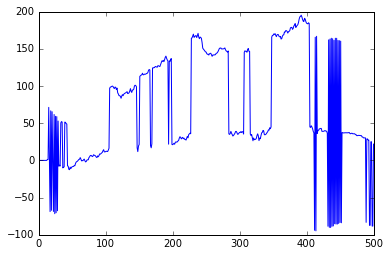

In [48]:
plt.plot(value)

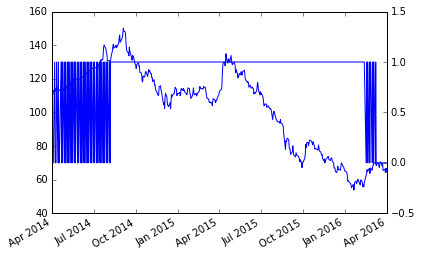

In [59]:
fig, ax1 = plt.subplots()
ax2=ax1.twinx()

ax1.plot(date_label, input_data[:, 0])
ax2.plot(date_label, state)
plt.ylim(-0.5, 1.5)
plt.gcf().autofmt_xdate()

Try another architechture that has three outputs; sell, hold, buy

In [198]:
class DQNMLP2(object):
    def __init__(self, n_stock, hidden_layers, n_actions=3, activation=tf.nn.relu,  
                           trade_stock_idx=0, n_batch=32,
                           gam=0.99, n_history=4, is_initialize=True):
        """initialized approximate value function
        
        Args:
            n_stock (int): the number of stock to use
            hiddne layers(list): list of the number of nodes in each hidden layer
            n_actions(int): the nubmer of allowable in our cases might be 3; sell, hold, and buy
            trade_stock_idx(int): trading stock index
            gam (float): discount factor
            n_history(int): nubmer of history that will be used as input
            n_batch (int): batch size
            freq_target_update (int): frequency of update for target network
            is_intialized(optional) (bool): if True, the graph will be initialized
        """
        print ("building model....")
        self.n_stock = n_stock
        self.hidden_layers = hidden_layers
        self.n_actions = n_actions
        self.activation = activation
        self.gam = gam
        self.n_history = n_history
        self.n_batch = n_batch
        self.trade_stock_idx = trade_stock_idx
        
        # intialize graph to avoid conflications
        if is_initialize is True:
            sess  = tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()
        
        self._stock_data = tf.placeholder(tf.float32, [self.n_batch, n_history, n_stock], name= "stock_data")
        # weather tarders is doing trade or not
        self._is_in = tf.placeholder(tf.int32, [self.n_batch], name="is_in")
        
        # change format for training
        stock_data_tilde = tf.reshape(self._stock_data, [self.n_batch, n_history * n_stock])
        is_in_tilde = tf.to_float(tf.reshape(self._is_in, [self.n_batch, 1]))
        self._input = tf.concat(1, [stock_data_tilde, is_in_tilde], name="input")
        self._target = tf.placeholder(tf.float32, [self.n_batch], name="target")
        
        # normalization for input
        n_layer0 = n_history * n_stock + 1
        shape = [n_layer0]
        gamma = tf.Variable(tf.constant(1.0, shape=shape), name="gamma")
        beta = tf.Variable(tf.constant(0.0, shape=shape), name="beta")
        self.normalized_input = self.batch_normalization(self._input, gamma=gamma, beta=beta)
                
        # keep parameters for pretraining
        self.gamma_list = []
        self.beta_list = []
        self.gamma_list.append(gamma)
        self.beta_list.append(beta)
        
        # parameters
        self.W_list = []
        self.b_list = []
        
        # the name of variable scope will be layer0, layer1, ...
        self.x_list = []
        x = self.normalized_input
        self.x_list.append(x)
        n_in = n_layer0
        for i_layer in xrange(len(hidden_layers)):
            with tf.variable_scope("hidden_layer%d" % i_layer):
                n_out = hidden_layers[i_layer]
                W = self.weight_variable([n_in, n_out])
                b = self.bias_variable([n_out])
                n_in = n_out
                
                # keep parameters for pretraining
                self.W_list.append(W)
                self.b_list.append(b)
                
                z = tf.matmul(x, W) + b
      
                shape = [n_out]
                gamma = tf.Variable(tf.constant(1.0, shape=shape), name="gamma")
                beta = tf.Variable(tf.constant(0.0, shape=shape), name="beta")
                
                # keep parameters for pretraining
                self.gamma_list.append(gamma)
                self.beta_list.append(beta)
                
                normalized_z = self.batch_normalization(z, shape, gamma, beta)
                x = self.activation(normalized_z)
                self.x_list.append(x)
        # each node should be corresponding to each action
        n_out = n_actions
        W = self.weight_variable([n_in, n_out])
        b = self.bias_variable([n_out])
                
        # keep parameters for pretraining
        self.W_list.append(W)
        self.b_list.append(b)
        self.output = tf.matmul(x, W) + b

        # actions should be +1:in, 0:hold, -1:out
        self._action = tf.placeholder(tf.int32, [self.n_batch], name="action")
        action_idx = self._action + 1
        self.Q = tf.pack([tf.gather(self.output[i, :], action_idx[i], name="chosen_action") for i in xrange(n_batch)], name="Q")
        
        # make graph for target
        # action index, 0: sell, 1: hold, 2: buy
        allow_action_indices = tf.pack([[1, 2], [0, 1]], name="allow_action_idices")
        index_of_q = tf.gather(allow_action_indices, self._is_in[i], name="index_of_q")
        allow_q_value = tf.pack([tf.gather(self.output[i, :], index_of_q,
                                                     name="allow_q_value") 
                                                     for i in xrange(self.n_batch)])
        self.opt_Q = tf.reduce_max(allow_q_value, reduction_indices=1, name="opt_Q")
        current_price = self._stock_data[:, n_history - 1, trade_stock_idx]
        hist_price = self._stock_data[:, n_history - 2, trade_stock_idx]
        self.reward = (current_price - hist_price) * tf.to_float(self._is_in)
        self.target_val = self.reward + gam * self.opt_Q
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[], name="learning_rate")
        self.loss = tf.reduce_mean(tf.square(self.Q - self._target))
        # fixate on using this optimizer, otherwize, otherwise endup using unecessary graph nose
        self.optimizer = tf.train.AdamOptimizer(self._learning_rate, name="Optimizer")
        self.train = self.optimizer.minimize(self.loss)
        
        # build nonbatch graph
        self._data_nonbatch = tf.placeholder(tf.float32, [self.n_history, self.n_stock], name= "nonbatch_stock_data")
        self._is_in_nonbatch = tf.placeholder(tf.int32, [1], name="nonbatch_is_in")
        
        # change format for training
        data_tilde = tf.reshape(self._data_nonbatch, [1, n_history * n_stock])
        is_in_tilde = tf.to_float(tf.reshape(self._is_in_nonbatch, [1, 1]))
        self._input_nonbatch = tf.concat(1, [data_tilde, is_in_tilde], name="nonbatch_input")
        
        # normalization for input
        normalized_input = self.batch_normalization(self._input_nonbatch, gamma=self.gamma_list[0], beta=self.beta_list[0])
        
        # the name of variable scope will be layer0, layer1, ...
        x = normalized_input
        for i_layer in xrange(len(hidden_layers)):
            with tf.variable_scope("hidden_layer%d" % i_layer):
                z = tf.matmul(x, self.W_list[i_layer]) + self.b_list[i_layer]
                normalized_z = self.batch_normalization(z, gamma=self.gamma_list[i_layer + 1], beta=self.beta_list[i_layer + 1])
                x = self.activation(normalized_z)
        self.output_nonbatch = tf.matmul(x, self.W_list[-1]) + self.b_list[-1]
        # out_idx = tf.gather(allow_action_indices, self._is_in_nonbatch[0])
        # self.allow_out_nonbatch = tf.gather(self.output_nonbatch[0, :], out_idx)
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
        
    def batch_normalization(self, input_data, shape=None, gamma=None, beta=None):
        # input should be hidden_dim
        eps = 1e-5
        if gamma is None:
            gamma = tf.Variable(tf.constant(1.0, shape=shape))
        if beta is None:
            beta = tf.Variable(tf.constant(0.0, shape=shape))
        mean, variance = tf.nn.moments(input_data, [0])
        return gamma * (input_data - mean) / tf.sqrt(variance + eps) + beta
    
    def eps_greedy(self, eps, is_in, stock_data, sess):
        """Return action chosen by greedy algorithm"""
        u = np.random.uniform()
        q_value = self.output_nonbatch.eval(session=sess, 
                                                                         feed_dict={self._is_in_nonbatch: [is_in],
                                                                                              self._data_nonbatch: stock_data})[0]
        if u < 1 - eps:
            action_idx = np.argsort(q_value)
            if is_in == 0 and action_idx[-1] == 0:
                action = action_idx[-2] - 1
            elif is_in == 1 and action_idx[-1] == 2:
                action = action_idx[-2] - 1
            else:
                action = action_idx[-1] - 1
        else:
            if is_in == 0:
                actions = [0, 1]
            elif is_in == 1:
                actions = [-1, 0]
            action = actions[np.random.randint(0, self.n_actions - 1)]  
        return action
                
    
    def training(self, stock_data, init_cash=1000, init_is_in=0, 
                         init_eps=1.0, decay_eps=0.99, min_eps=0.1, 
                         learning_rate=1e-4, n_memory=1000, n_epochs=100):
        """training DQN which consider three actions; sell, buy, hold
              money and n_stock are considered as state variable
        
        Args:
            data (list): stock price for one company
            n_memory (int): the number of data that is used for Experience Replay
            eps (float): the epsilon of greedy epsilon used for behavior policy
            init_cash (float): initial available cash
            init_stock (int): the number of stock data 
        """
        init_op = tf.initialize_all_variables()
        saver = tf.train.Saver()
        T = len(stock_data)
        print_freq = int(T / 10)
        if print_freq == 0:
            print_freq = 1
        with tf.device(:/gpu:0)
        print ("training....")
        # Added to avoid allocation the full GPU memory to tf
        config = tf.ConfigProto()
        config.gpu_options.allow_growth=True
        st = time.time()
        with tf.Session(config=config) as sess:
            sess.run(init_op)
            value_list  = []
            eps = init_eps
            lr = learning_rate
            is_in = init_is_in
            # policy_is_in = init_is_in
            cash = init_cash
            # policy_cash = init_cash
            # analize which timing sell and buy are executed
            # assumed that in the first n_history we do nothing
            state = [init_is_in]  * (self.n_history)
            for t in xrange(self.n_history, T):
                # memory pool used for Experience Replay
                # length should be less than n_memory
                action_memory = []
                stock_data_memory = []
                is_in_memory = []
                new_sd_memory = []
                new_is_in_memory = []
                end_idx_memory = []
                # select action with e-greedy for replay memory
                # buy:+1, hold: 0, sell: -1
                stock_price = stock_data[t - self.n_history:t]
                action= self.eps_greedy(eps, is_in, stock_price, sess)
                new_is_in = is_in + action
                cash -= action * stock_data[t - 1][self.trade_stock_idx]
                new_stock_price = stock_data[t - self.n_history + 1:t + 1]
                # add memory pools whose capacity is up to n_memory
                if len(action_memory) == n_memory:
                    del action_memory[0]
                    del stock_data_memory[0]
                    del is_in_memory[0]
                    del new_sd_memory[0]
                    del new_is_in_memory[0]
                action_memory.append(action)
                # reward_memory.append(reward)
                stock_data_memory.append(stock_price)
                is_in_memory.append(is_in)
                new_sd_memory.append(new_stock_price)
                new_is_in_memory.append(new_is_in)
                
                for epoch in xrange(n_epochs):    
                    # select transition from pool
                    idx = np.random.randint(0, len(action_memory), self.n_batch)
                    action_batch = [action_memory[i] for i in idx]
                    data_batch = [stock_data_memory[i] for i in idx]
                    is_in_batch = [is_in_memory[i] for i in idx]
                    new_data_batch = [new_sd_memory[i] for i in idx]
                    new_is_in_batch = [new_is_in_memory[i] for i in idx]

                    target = self.target_val.eval(session=sess, 
                                                                      feed_dict={self._is_in: new_is_in_batch,
                                                                                           self._stock_data: new_data_batch})
                    
                    sess.run(self.train, 
                                    feed_dict={self._action: action_batch, 
                                                         self._stock_data: data_batch,
                                                         self._is_in: is_in_batch,
                                                         self._target: target,
                                                         self._learning_rate: lr})  
                
                state.append(new_is_in)
                value = cash + stock_data[t, self.trade_stock_idx] * new_is_in
                value_list.append(value)
                
                # renew variable
                is_in = new_is_in
                
                if t % print_freq == 0:
                    print ("t: %d, current value:%f, is_in:%d, cash:%f, eps:%f" % (t, value, new_is_in, cash, eps))
                    print ("elapsed time", time.time() - st)    
                
                eps *= decay_eps
                if eps <= min_eps:
                    eps = min_eps
            
            save_path = saver.save(sess, "/jupyter/tomoaki/DQN/trained_params.ckpt")
            print("Model saved in file: %s" % save_path)
            print ("elapsed time: ", time.time() - st)
           
        return value_list, state

In [201]:
test_idx = date_label.index(datetime.datetime(2015, 4, 1, 0, 0))
trade_data = input_data[:, 0]
n_history = 4
n_stock = len(input_data[0])
n_in = n_history * n_stock + 1
n_hid1 = int(n_in * 0.5)
n_hid2 = int(n_hid1 * 0.5)
n_hid3 = int(n_hid1 * 0.5)
n_actions=3
hidden_layers = [n_hid1, n_hid2,n_hid3]
train = input_data[:test_idx]
test = input_data[test_idx:]
date_test = date_label[test_idx:]
trade_stock_idx = 0

dqn = DQNMLP2(n_stock, hidden_layers, n_actions, trade_stock_idx=trade_stock_idx)
print ("start!")
value, state = dqn.training(stock_data=input_data, n_epochs=10, init_cash=0, decay_eps=0.95, min_eps=0.1)

building model....
start!
training....
t: 50, current value:-2.380001, is_in:0, cash:-2.380001, eps:0.100000
elapsed time 7.44986391068
t: 100, current value:14.919985, is_in:1, cash:-64.270017, eps:0.100000
elapsed time 13.9679529667
t: 150, current value:14.639993, is_in:0, cash:14.639993, eps:0.100000
elapsed time 20.4859848022
t: 200, current value:40.290000, is_in:0, cash:40.290000, eps:0.100000
elapsed time 27.0263409615
t: 250, current value:52.400015, is_in:1, cash:-61.329988, eps:0.100000
elapsed time 33.4371438026
t: 300, current value:47.789999, is_in:0, cash:47.789999, eps:0.100000
elapsed time 40.0024709702
t: 350, current value:42.889989, is_in:1, cash:-75.360011, eps:0.100000
elapsed time 46.4766099453
t: 400, current value:44.800016, is_in:1, cash:-96.899981, eps:0.100000
elapsed time 53.0489089489
t: 450, current value:29.549995, is_in:0, cash:29.549995, eps:0.100000
elapsed time 59.4965529442
t: 500, current value:29.470008, is_in:0, cash:29.470008, eps:0.100000
elaps

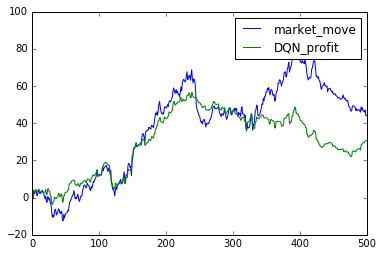

In [211]:
n_data = len(value)
input_data_tilde = input_data[-n_data:, trade_stock_idx] - input_data[-n_data, trade_stock_idx]
# input_data_tilde = input_data_tilde - input_data_tilde[0]
# plt.plot(date_label[-n_data:], input_data_tilde, label="market_move")
# plt.plot(date_label[-n_data:], value, label="DQN_profit")
# plt.gcf().autofmt_xdate()
plt.plot(input_data_tilde, label="market_move")
plt.plot(value, label="DQN_profit")
plt.legend()
plt.savefig("DQN_vs_Market.png")

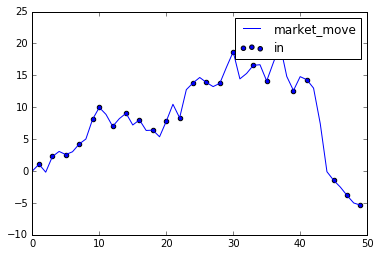

In [212]:
n_data = len(value)
beg = -300
end = -250
n_data = n_small
state_tilde = np.array(state)[beg:end]
in_idx = np.where(np.array(state_tilde) == 1)
input_data_tilde = input_data[beg:end, trade_stock_idx] - input_data[beg, trade_stock_idx]
plt.plot(input_data_tilde, label="market_move")
plt.scatter(in_idx, input_data_tilde[in_idx], label="in")
n_data = end - beg
plt.xlim(0, n_data)
plt.legend()
plt.savefig("in_timing.png")

In [206]:
print(state)

[0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 

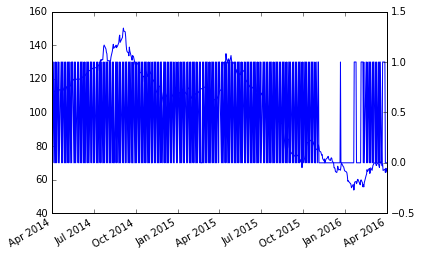

In [138]:
fig, ax1 = plt.subplots()
ax2=ax1.twinx()

ax1.plot(date_label, input_data[:, 0])
ax2.plot(date_label, state)
plt.ylim(-0.5, 1.5)
plt.gcf().autofmt_xdate()

In [175]:
test_idx = date_label.index(datetime.datetime(2015, 4, 1, 0, 0))
trade_data = input_data[:, 0]
n_history = 4
n_stock = len(input_data[0])
n_in = n_history * n_stock + 1
n_hid1 = int(n_in * 0.5)
n_hid2 = int(n_hid1 * 0.5)
n_hid3 = int(n_hid1 * 0.5)
n_actions=3
hidden_layers = [n_hid1, n_hid2,n_hid3]
train = input_data[:test_idx]
test = input_data[test_idx:]
date_test = date_label[test_idx:]
trade_stock_idx = 0

dqn = DQNMLP2(n_stock, hidden_layers, n_actions, trade_stock_idx=trade_stock_idx)
print ("start!")
value, state = dqn.training(stock_data=input_data, n_epochs=10, init_cash=0, decay_eps=0.95, min_eps=0.1)

building model....
start!
training....
t: 50, current value:-12.329999, is_in:0, cash:-12.329999, eps:0.100000
elapsed time 7.22332000732
t: 100, current value:5.419985, is_in:1, cash:-73.770017, eps:0.100000
elapsed time 13.6477611065
t: 150, current value:-0.630003, is_in:0, cash:-0.630003, eps:0.100000
elapsed time 20.1749241352
t: 200, current value:19.449969, is_in:0, cash:19.449969, eps:0.100000
elapsed time 26.6628050804
t: 250, current value:20.869905, is_in:0, cash:20.869905, eps:0.100000
elapsed time 33.0890932083
t: 300, current value:19.769930, is_in:1, cash:-93.210073, eps:0.100000
elapsed time 39.504306078
t: 350, current value:28.609939, is_in:0, cash:28.609939, eps:0.100000
elapsed time 45.8806810379
t: 400, current value:48.979928, is_in:1, cash:-92.720069, eps:0.100000
elapsed time 52.3734490871
t: 450, current value:41.299957, is_in:1, cash:-82.520043, eps:0.100000
elapsed time 58.7566261292
t: 500, current value:34.129957, is_in:1, cash:-78.070040, eps:0.100000
elap

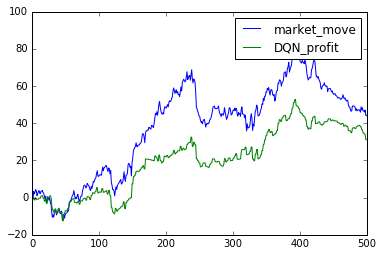

In [176]:
n_data = len(value)
input_data_tilde = input_data[-n_data:, trade_stock_idx] - input_data[-n_data, trade_stock_idx]
plt.plot(input_data_tilde, label="market_move")
plt.plot(value, label="DQN_profit")
plt.legend()

In [188]:
print (np.where(state = 1))

TypeError: where() takes no keyword arguments

# try for another stock

In [180]:
test_idx = date_label.index(datetime.datetime(2015, 4, 1, 0, 0))
trade_data = input_data[:, 0]
n_history = 4
n_stock = len(input_data[0])
n_in = n_history * n_stock + 1
n_hid1 = int(n_in * 0.5)
n_hid2 = int(n_hid1 * 0.5)
n_hid3 = int(n_hid1 * 0.5)
n_actions=3
hidden_layers = [n_hid1, n_hid2,n_hid3]
train = input_data[:test_idx]
test = input_data[test_idx:]
date_test = date_label[test_idx:]
trade_stock_idx = 10

dqn = DQNMLP2(n_stock, hidden_layers, n_actions, trade_stock_idx=trade_stock_idx)
print ("start!")
value, state = dqn.training(stock_data=input_data, n_epochs=10, init_cash=0, decay_eps=0.95, min_eps=0.1)

building model....
start!
training....
t: 50, current value:-1.060000, is_in:0, cash:-1.060000, eps:0.100000
elapsed time 7.02083611488
t: 100, current value:-0.959999, is_in:0, cash:-0.959999, eps:0.100000
elapsed time 13.59176898
t: 150, current value:0.459998, is_in:0, cash:0.459998, eps:0.100000
elapsed time 20.2141549587
t: 200, current value:0.269995, is_in:0, cash:0.269995, eps:0.100000
elapsed time 26.6654651165
t: 250, current value:-0.200007, is_in:0, cash:-0.200007, eps:0.100000
elapsed time 33.1138091087
t: 300, current value:0.039998, is_in:1, cash:-34.430003, eps:0.100000
elapsed time 39.7669200897
t: 350, current value:3.239992, is_in:0, cash:3.239992, eps:0.100000
elapsed time 46.3919939995
t: 400, current value:7.430012, is_in:1, cash:-42.259987, eps:0.100000
elapsed time 52.9416451454
t: 450, current value:10.210024, is_in:1, cash:-42.949976, eps:0.100000
elapsed time 59.3576290607
t: 500, current value:8.990017, is_in:0, cash:8.990017, eps:0.100000
elapsed time 65.90

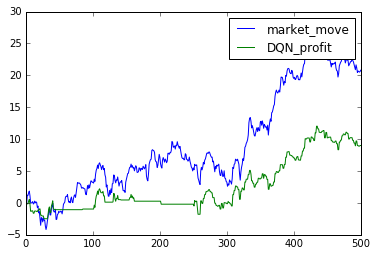

In [182]:
n_data = len(value)
input_data_tilde = input_data[-n_data:, trade_stock_idx] - input_data[-n_data, trade_stock_idx]
plt.plot(input_data_tilde, label="market_move")
plt.plot(value, label="DQN_profit")
plt.legend()

In [183]:
test_idx = date_label.index(datetime.datetime(2015, 4, 1, 0, 0))
trade_data = input_data[:, 0]
n_history = 4
n_stock = len(input_data[0])
n_in = n_history * n_stock + 1
n_hid1 = int(n_in * 0.5)
n_hid2 = int(n_hid1 * 0.5)
n_hid3 = int(n_hid1 * 0.5)
n_actions=3
hidden_layers = [n_hid1, n_hid2,n_hid3]
train = input_data[:test_idx]
test = input_data[test_idx:]
date_test = date_label[test_idx:]
trade_stock_idx = 20

dqn = DQNMLP2(n_stock, hidden_layers, n_actions, trade_stock_idx=trade_stock_idx)
print ("start!")
value, state = dqn.training(stock_data=input_data, n_epochs=10, init_cash=0, decay_eps=0.95, min_eps=0.1)

building model....
start!
training....
t: 50, current value:1.420005, is_in:0, cash:1.420005, eps:0.100000
elapsed time 7.09949994087
t: 100, current value:2.770007, is_in:0, cash:2.770007, eps:0.100000
elapsed time 13.520512104
t: 150, current value:0.430011, is_in:0, cash:0.430011, eps:0.100000
elapsed time 20.0054810047
t: 200, current value:0.380012, is_in:0, cash:0.380012, eps:0.100000
elapsed time 26.6002149582
t: 250, current value:-1.239987, is_in:0, cash:-1.239987, eps:0.100000
elapsed time 33.1918101311
t: 300, current value:-1.659985, is_in:1, cash:-54.149987, eps:0.100000
elapsed time 39.7075109482
t: 350, current value:-4.140000, is_in:0, cash:-4.140000, eps:0.100000
elapsed time 46.1267390251
t: 400, current value:-2.620008, is_in:1, cash:-53.830007, eps:0.100000
elapsed time 52.6806111336
t: 450, current value:-2.500009, is_in:1, cash:-54.190008, eps:0.100000
elapsed time 59.292550087
t: 500, current value:-3.860005, is_in:1, cash:-53.440007, eps:0.100000
elapsed time 65

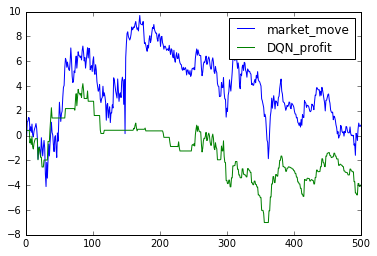

In [184]:
n_data = len(value)
input_data_tilde = input_data[-n_data:, trade_stock_idx] - input_data[-n_data, trade_stock_idx]
plt.plot(input_data_tilde, label="market_move")
plt.plot(value, label="DQN_profit")
plt.legend()

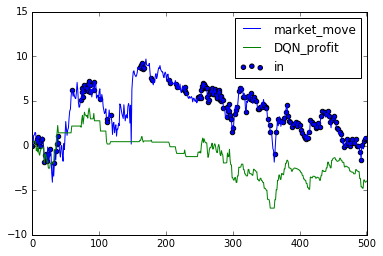

In [195]:
n_data = len(value)
state_tilde = np.array(state)[-n_data:]
in_idx = np.where(np.array(state_tilde) == 1)
input_data_tilde = input_data[-n_data:, trade_stock_idx] - input_data[-n_data, trade_stock_idx]
plt.plot(input_data_tilde, label="market_move")
plt.plot(value, label="DQN_profit")
plt.scatter(in_idx, input_data_tilde[in_idx], label="in")
plt.xlim(0, n_data)
plt.legend()

# CNN

In [ ]:
def weight_variable(self, shape):
    initial = tf.truncated_normal(shape, stddev=1.0)
    return tf.Variable(initial, name="weight")
        
def bias_variable(self, shape):
    initial = tf.constant(0.0, shape=shape)
    return tf.Variable(initial, name="bias")
        
def batch_normalization(self, input_data, shape=None, gamma=None, beta=None):
    # input should be hidden_dim
    eps = 1e-5
    if gamma is None:
        gamma = tf.Variable(tf.constant(1.0, shape=shape))
    if beta is None:
        beta = tf.Variable(tf.constant(0.0, shape=shape))
    mean, variance = tf.nn.moments(input_data, [0])
    return gamma * (input_data - mean) / tf.sqrt(variance + eps) + beta

class FullyConnected(object):
    def __init__(self, n_in, n_out, activation=tf.nn.relu):
        self.n_in = n_in
        self.n_out = n_out
        self.activation = activation
        self.W = weight_variable([n_in, n_out])
        self.b = bias_variable([n_out])
        
    def set_input(self, input):
        self.input = input
        x = tf.matmul(self.input, W) + b
        normalized_x = batch_normalization(x, [n_out])
        self.output = self.activation(normalized_x)
        return self.output

class Convolution(object):
    def __init__(self, n_in, filter_size, pool_size, n_out):
        """one dimentional CNN, so filter_size and pool_size sould be integer"""
        self.n_in = n_in
        self.filter_shape = filter_shape
        self.n_out = n_out
        
    def set_input(self, input):
        self.input = input
        x = tf.nn.conv2d(self.input, self.W, strides=[1, 1, self.pool_size, 1], padding="SAME")
        normalized_x = batch_normalization(x, shape)
        z = self.activation(normalized_x)
        self.output = tf.nn.max_pool(z, ksize=[1, 1, self.pool_size, 1], padding="SAME")
        
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')
        
